In [2]:
import os
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
eps = 1e-10

In [5]:
out_dir = 'dynamic-prediction-equilibria/out/replication/inits_pres/'

params, dynamics, means = dict(), dict(), dict()

for run in os.listdir(out_dir):
    if run == ".DS_Store":
        continue
    with open(os.path.join(out_dir, run, "run_data.json"), 'r') as f:
        run_data = json.load(f)
        i = int(run[4:])
        params[i] = run_data['run_parameters']
        dynamics[i] = run_data['dynamics']
        means[i] = run_data['means']

In [6]:
pd.DataFrame.from_dict(params, 'index').sort_index()

,demand,initial_distribution,reroute_interval,horizon,fitness,replication_coef,regularization,regularization_coef,regularization_decay,window_size
0,4.5,"[[[0], 0.01], [[1], 0.99]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,0.3
1,4.5,"[[[0], 0.1], [[1], 0.9]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,0.3
2,4.5,"[[[0], 0.5], [[1], 0.5]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,0.3
3,4.5,"[[[0], 0.9], [[1], 0.1]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,0.3
4,4.5,"[[[0], 0.99], [[1], 0.01]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,0.3
6,4.5,"[[[0], 0.01], [[1], 0.99]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,1.0
7,4.5,"[[[0], 0.1], [[1], 0.9]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,1.0
8,4.5,"[[[0], 0.5], [[1], 0.5]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,1.0
9,4.5,"[[[0], 0.9], [[1], 0.1]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,1.0
10,4.5,"[[[0], 0.99], [[1], 0.01]]",0.01,100.0,neg_proj_tt,0.1,None,1.0,0.05,1.0


In [13]:
proj_ids = []#[2, 3, 9, 1, 7, 8, 11, 10, 12, 13, 4, 14, 5, 6] #[5, 20, 6, 8, 21, 18, 22, 24, 23, 7, 19, 9, 26, 25] 
proj_less_ids = [6+k for k in range(5)] #[2, 3, 12, 4, 5, 6] #[5, 6, 8, 24, 7, 9]
reg_pred_ids = [2, 17, 3, 4]
ids = []
com_id = '0'

In [14]:
proj_less_ids

[6, 7, 8, 9, 10]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


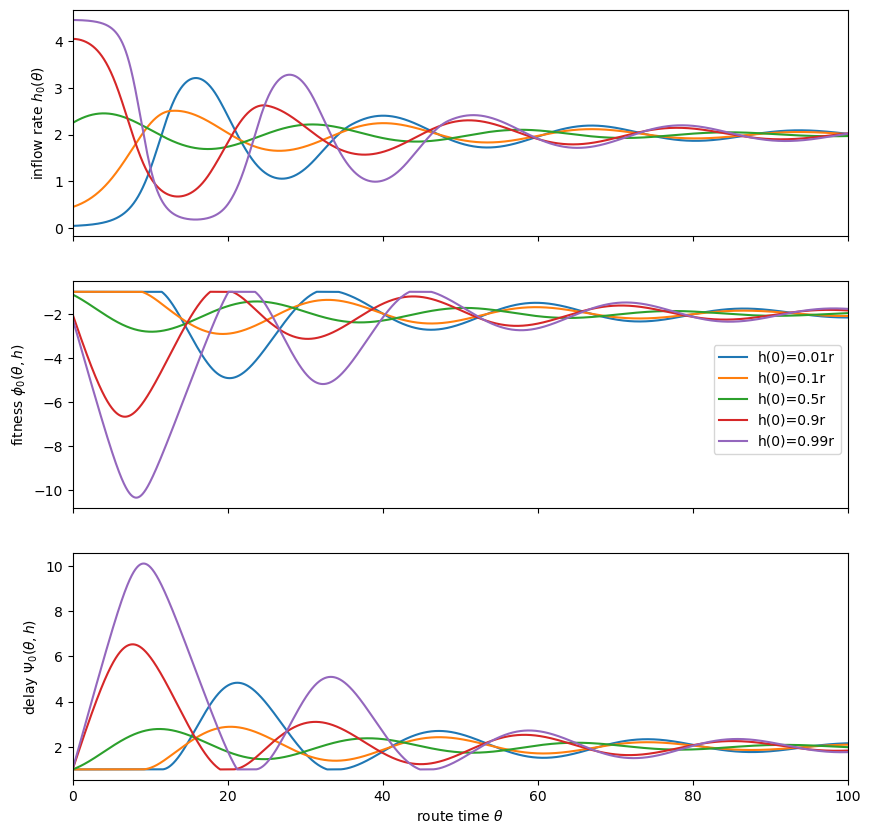

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10), sharex='col', sharey='row')

def get_label(run_id):
    gamma = r'$\gamma$'
    #return f"{gamma}={params[run_id]['regularization_decay']}"
#     return f"w={round(params[run_id]['window_size'], 2)}"
    h0 = list(params[run_id]['initial_distribution'])[0][1]
    return f"h(0)={round(h0, 2)}r"

    
for i in proj_less_ids:
    ax1.plot(dynamics[i][com_id]['inflow share']['times'], [params[i]['demand']*v for v in dynamics[i][com_id]['inflow share']['values']], label=get_label(i))
    ax2.plot(dynamics[i][com_id]['fitness']['times'], dynamics[i][com_id]['fitness']['values'], label=get_label(i))
    ax3.plot(dynamics[i][com_id]['travel time']['times'], dynamics[i][com_id]['travel time']['values'], label=get_label(i))

#     ax2.plot(data['means']['fitness']['times'], data['means']['fitness']['values'], '--', label='mean')
# ax3.plot(data['means']['travel time']['times'], data['means']['travel time']['values'], '--', label='mean')
        
# ax1.set_ylim(0,1)
ax3.set_xlim(0,100)
ax3.set_xlabel(r'route time $\theta$')

ax1.set_ylabel(r'inflow rate $h_0(\theta)$')
ax2.set_ylabel(r'fitness $\phi_0(\theta, h)$')
ax3.set_ylabel(r'delay $\Psi_0(\theta, h)$')

#ax1.semilogy()

ax2.legend(bbox_to_anchor=(1,0.75))
plt.savefig('replicator.eps', format='eps')

In [94]:
def get_amplitudes(inflow_dict):
    t = np.array(inflow_dict['times'])
    inflow = np.array(inflow_dict['values'])
    start = 0
    amplitudes = []
    while start < t[-1]:
        vals = inflow[t >= start]
        if not vals.max()-vals.min() > eps:
            break
        amplitudes.append(vals.max()-vals.min())
        start += 1
        
    return np.array(amplitudes)

def estimate_decay(amplitudes):
    
    T = np.arange(amplitudes.size)
                  
    lin=LinearRegression()
    lin.fit(T.reshape(-1,1), np.log(amplitudes))
    return lin.coef_.item()

def theoretical_decay(run_params):
    w = run_params['window_size']
    k = run_params['replication_coef']*(1 - 0)
    if w <= 2/np.sqrt(k):
        return -k*w/2
    else:
        return -(k*w - np.sqrt((k*w)**2 - 4*k))/2
 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


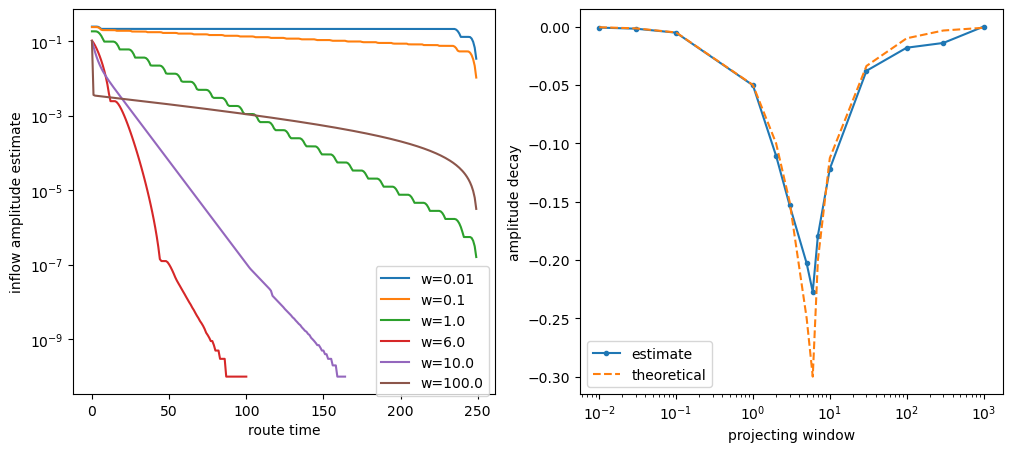

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for i in proj_less_ids:
    amps = get_amplitudes(dynamics[i][com_id]['inflow share'])
    ax1.plot(np.arange(amps.size), amps, label=f"w={params[i]['window_size']}")
    
ax1.semilogy()
ax1.legend(bbox_to_anchor=(0.7,0.35))
ax1.set_xlabel('route time')
ax1.set_ylabel('inflow amplitude estimate')

w = [params[i]['window_size'] for i in proj_ids]
decay = [estimate_decay(get_amplitudes(dynamics[i][com_id]['inflow share'])) for i in proj_ids]
exp_decay = [theoretical_decay(params[i]) for i in proj_ids]
ax2.plot(w, decay, '.-', label='estimate')
ax2.plot(w, exp_decay, '--', label='theoretical')
ax2.semilogx()
ax2.legend()
ax2.set_xlabel('projecting window')
ax2.set_ylabel('amplitude decay')

plt.savefig('amplitudes.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


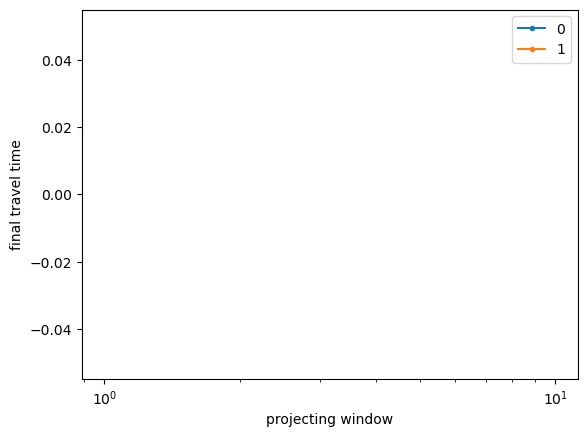

In [64]:
w = [params[i]['window_size'] for i in ids]
tts = {com: [dynamics[i][com]['travel time']['values'][-1] for i in ids] for com in ['0', '1']}
amps = {com: [] for com in ['0', '1']}

for com, tt in tts.items():
    plt.plot(w, tt, '.-', label=com)
plt.semilogx()
plt.xlabel('projecting window')
plt.ylabel('final travel time')
plt.legend()

plt.savefig('final_travel_times.eps', format='eps')

Text(0, 0.5, 'inflow amplitude estimate')

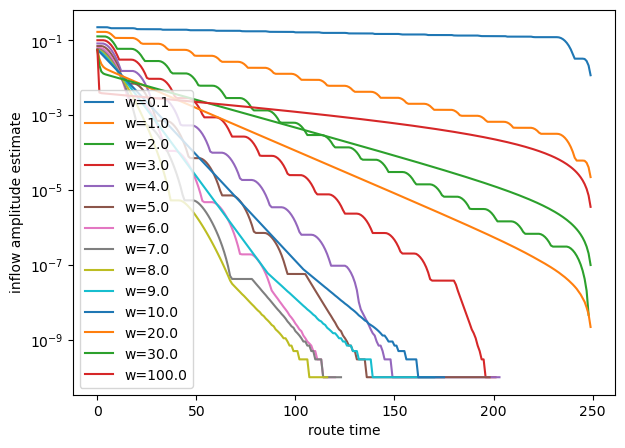

In [69]:
fig, (ax1) = plt.subplots(1, figsize=(7,5))

for i in ids:
    ax1.plot(get_amplitudes(dynamics[i][com_id]['inflow share']), label=get_label(i))
    
ax1.semilogy()
ax1.legend(loc='lower left')
ax1.set_xlabel('route time')
ax1.set_ylabel('inflow amplitude estimate')

# plt.savefig('reg_pred_tt.eps', format='eps')

In [1]:
gammas = [params[i]['regularization_decay'] for i in reg_pred_ids]
tts = {com: [dynamics[i][com]['travel time']['values'][-1] for i in reg_pred_ids] for com in ['0', '1']}

for com, tt in tts.items():
    plt.plot(gammas, tt, '.-', label=com)
# plt.semilogx()
plt.xlabel('regularization decay')
plt.ylabel('final travel time')
plt.legend()


NameError: name 'reg_pred_ids' is not defined

In [24]:
run_id = 12
com='0'


inflow = np.array(dynamics[run_id]['0']['inflow share']['values'])
t = np.array(dynamics[run_id]['0']['inflow share']['times'])
dt = params[run_id]['reroute_interval']

amps = get_amplitudes(dynamics[run_id]['0']['inflow share'])
estimate_decay(amps)

-0.18641520835110847

In [25]:
theoretical_decay(params[run_id])

-0.09876543209876544

[]

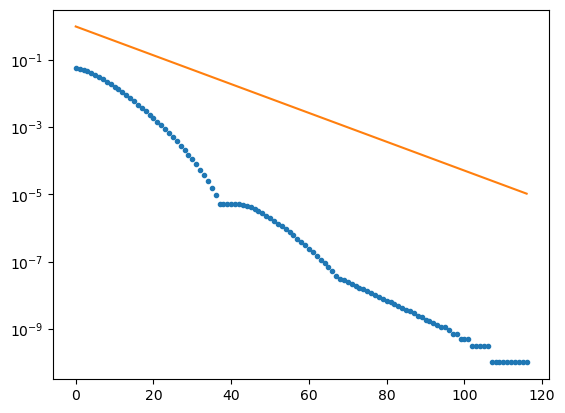

In [27]:
T = np.arange(amps.size)
plt.plot(T, amps, '.')
plt.plot(T, np.exp(theoretical_decay(params[run_id])*T))
plt.semilogy()